In [1]:
# This is the start of a new code to analyze RNA-seq bulk data from a normalized table downloaded from:
# https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE145936

# DATE: April 26, 2024
# LAST MODIFIED ON:  April 30, 2024
# BY: Leo Lagunes

# The goal of this script is to plot the gene expression leves of proteasome genes and Rpn4 over time 
# In the study this data came from, they heat-shocked yeast and measured gene expression levels at different time points:
# "We performed 12 RNA seq of polyA+ mRNA from yeast cells over two time courses: following heat shock at 39C and following 
    # nuclear depletion of the J-protein Sis1 using the "anchor away" approach. For both time series, the time points were 
    # 0, 15, 30, 60, 90 and 120 minutes." (the first 6 HS time points!)
     

In [2]:
# === PACKAGES NEEDED === 

import numpy as np # for mathematical computing
from scipy.integrate import odeint # for ode solving
import matplotlib.pyplot as plt # for plotting 
import math  # for other math functions
from scipy.integrate import solve_ivp  # for ode solving
import seaborn as sns # for the heatmaps
from datetime import date # to print date
from datetime import datetime # to print data
import pandas as pd # to read txt file
import csv # to open csv file 

# datetime object containing current date and time
now = datetime.now()
dt_string = now.strftime("%m/%d/%Y %I:%M %p")

print('All packages loaded on ', dt_string)


All packages loaded on  04/30/2024 11:27 AM


In [3]:
# ==== FUNCTIONS ===
# These are all the user-defined functions I will need

# testing a change for github


print('All function ready on ', dt_string)

All function ready on  04/30/2024 11:27 AM


In [ ]:
# === RUNNING CODE ===
# This is the code I will need to run to get that time course 


In [4]:
# scratch work for now


# load txt matrix which is in the data folder 
# this .csv file has only the genes of interest - I removed all the other genes since I only need those 
    # associated with the proteasome (and Rpn4)
X = pd.read_csv('Data/Gene_counts_normalized_reduced.csv', sep="\t", header=None)

geneExprList_tot = []; geneLabels = []; 
#print(X)
with open('Data/Gene_counts_normalized_reduced.csv', 'r') as fd:
    reader = csv.reader(fd)
    for row in reader:
        # print(row)
        # store gene names
        geneLabels.append(row[1])
        # add to a new array as a float (currently as string)
        el2add = row[2:8]; res = [float(ele) for ele in el2add]; # need the gene name and the first 6 time point readings
        geneExprList_tot.append(res)
        
        # create a dictionary to hold the tc for each gene
        # CODE HERE FOR DICTIONARY 

#print(geneLabels)
#print(geneExprList_tot)
# prepare matrix for plotting 
geneExprTranspose=np.transpose(geneExprList_tot)
print(geneExprTranspose)

[[ 350.83  660.31 1125.23 1316.33 1071.04 1069.61 1051.07  895.62 1440.41
   898.47 1480.34  929.85 1021.12  935.55  917.01 1371.95 1343.43 1628.66
   531.95  808.63  524.82 1227.91  189.68 2267.57 1463.23 1595.86 1146.62
  1220.78 1464.65  835.72  549.07  636.06  909.88 1303.5   693.11 1844.01
   644.62]
 [1226.25 1106.27 1952.23 2342.68 1849.54 1766.16 1660.41 1462.14 2102.72
  1360.46 1868.86 1543.48 1836.32 1550.6  1465.19 1747.86 1740.74 2620.26
   721.92 1196.76  892.74 1579.07  693.45 2884.63 2302.01 2568.41 1900.38
  1967.48 1939.01 1181.51  959.85  750.39 1464.17 1883.09 1235.4    56.94
  1342.16]
 [ 872.43  802.49 1469.85 1834.94 1284.93 1392.8  1193.66 1212.62 1557.56
  1001.63 1461.55 1162.84 1256.48 1198.4  1094.09 1207.88 1264.78 2234.41
   516.82  884.28  737.29 1318.12  503.78 2320.94 1709.29 2066.08 1460.36
  1532.67 1395.17  849.9   828.57  560.68 1190.1  1366.72  839.24  136.32
  1158.1 ]
 [ 769.25  600.27  993.72 1134.12  981.11 1043.32  757.48  994.56 1125.71
   88

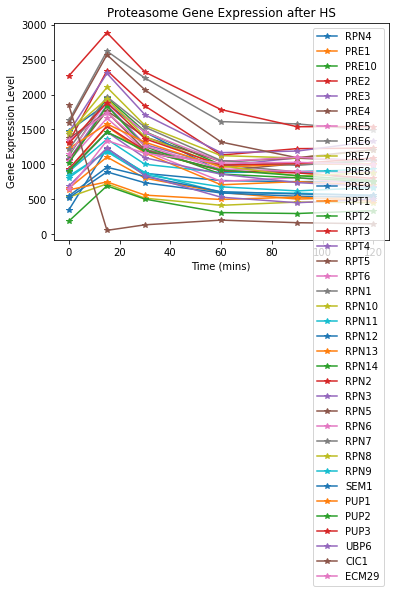

In [5]:
# plot gene expression list for each gene 

x = [0, 15, 30, 60, 90 ,120] # in minutes
y = geneExprList_tot
rpn4 = geneExprList_tot[0]
plt.xlabel("Time (mins)")
plt.ylabel("Gene Expression Level")
plt.title("Proteasome Gene Expression after HS")

for geneI in range(len(y)):
    plt.plot(x,geneExprList_tot[geneI],'-*', label = geneLabels[geneI])

# SEPARATE INTO PLOTS THAT WILL SHOW RPN4 VS ALPHA AND BETA, RPN4 VS RPTS AND RPNS, RPN4 VS OTHERS(?)

#plt.plot(x,rpn4, "-*")
plt.legend()
plt.show()

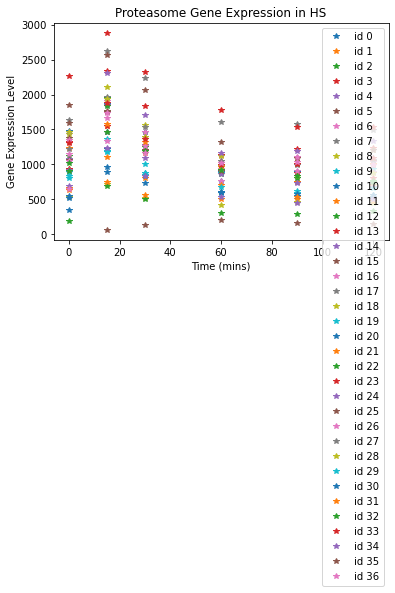

In [74]:
# plot gene expression for groups (CP, RP and rpn4)


x = [0, 15, 30, 60, 90 ,120] # in minutes
y = geneExprList_tot
rpn4 = geneExprList_tot[0]
plt.xlabel("Time (mins)")
plt.ylabel("Gene Expression Level")
plt.title("Proteasome Gene Expression after HS")

for geneI in range(len(y)):
    plt.plot(x,geneExprList_tot[geneI],'-*', label = geneLabels[geneI])

# SEPARATE INTO PLOTS THAT WILL SHOW RPN4 VS ALPHA AND BETA, RPN4 VS RPTS AND RPNS, RPN4 VS OTHERS(?)

#plt.plot(x,rpn4, "-*")
plt.legend()
plt.show()




